In [1]:
from statistics import mean

import pandas as pd
from string import ascii_letters, digits

import cython #ENSURE cython package is installed on computer/canopy
from gensim.models import phrases 
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from scipy import spatial
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE
from gensim.test.utils import datapath

import os
import csv
import json
from xml.etree import cElementTree as ET

from nltk.translate.meteor_score import wordnetsyn_match
from nltk.data import load
import re
# from flair.embeddings import FlairEmbeddings, StackedEmbeddings, FastTextEmbeddings, ELMoEmbeddings, BertEmbeddings
# from flair.data import Sentence

import numpy as np
import random
import matplotlib.pyplot as plt
import jsonlines
import datetime


import nltk
# nltk.download('punkt')

#load up libraries (you may need to install some of these, with conda install or pip install, if not already installed)
from gensim.models import Word2Vec, KeyedVectors
from itertools import combinations
from numpy import mean, std, equal
from sklearn.metrics.pairwise import cosine_similarity
from seaborn import stripplot
import matplotlib.pyplot as plt
from pylab import rcParams
from pylab import xlim


translator = str.maketrans(ascii_letters, ascii_letters, digits)
tokenizer = load('tokenizers/punkt/english.pickle')

In [2]:
def stripword(word):
    word = word.replace("[", "")
    word = word.replace("]", "")
    word = word.replace("'", "")
    word = word.replace("'", "")
    word = word.replace(",", "")
    word = word.replace(".", "")
    word = word.replace("_", "")
    word = word.replace(":", "")
    word = word.replace("-", "")
    word = word.replace("*", "")
    word = word.replace("/", "")
    word = word.replace("(", "")
    word = word.replace(")", "")
    word = word.replace("´", "")
    word = word.replace("`", "")
    word = word.replace(";", "")
    word = word.replace("__END", "")
    word = word.replace("BEG__", "")
    return word

In [ ]:
def tokenize_folder():
    sentences = []
    for fname in os.listdir(os.path.join(os.getcwd(), 'cTakes archive')): #go through all file names in current directory
        if 'txt' in fname:
            with open(os.path.join(os.getcwd(), 'cTakes archive', fname)) as file:
                for l in file:
                    l = l.translate(translator)
                    l = re.sub(apas_error, "'", l)
                    l = l.strip()
                    l = l.lower()
                    l = stripword(l)
                    if len(l.split()) > 7:
                        l = l + ' .'
                        sentences.append(l.split())
    return sentences


def tokenize_json():
    sentences = []
    with jsonlines.open(('/home/schaa/Insight_Project_Framework/data/raw/news_data/aylien-covid-news.jsonl') as json_f:
        dataset = json.load(json_f)
        for data in dataset:
            for l in data['supports']:
                l = l.translate(translator)
                l = l.strip()
                l = tokenizer.tokenize(l)
                l = [stripword(n.lower()) for n in l]
                for sent in l:
                    if len(sent.split()) > 7:
                        sent = sent + ' .'
                        sentences.append(sent.split())
    return sentences


def tokenize_json2():
    sentences = []
    with open('train1.0.json') as json_f:
        dataset = json.load(json_f)
        data = dataset[DATA_KEY]
        for datum in data:
            l = datum[DOC_KEY][CONTEXT_KEY]
            l = l.translate(translator)
            l = l.strip()
            l = tokenizer.tokenize(l)
            l = [stripword(n.lower()) for n in l]
            for sent in l:
                if len(sent.split()) > 7:
                    sent = sent + ' .'
                    sentences.append(sent.split())
    return sentences


def tokenize_file():
    sentences = []
    with open(os.path.join(os.getcwd(), 'cTakes archive', fname)) as file:
        for i in range(0,7):
            next(file, None)
        for l in file:
            l = l.translate(translator)
            l = l.strip()
            l = l.lower()
            l = stripword(l)
            sentences.append(l.split())
    return sentences




def tokenize_xml():
    sentences = []
    for fname in os.listdir(os.path.join(os.getcwd(), 'cTakes archive/2try')): #go through all file names in current directory
        if 'xml' in fname:
            tree = ET.fromstring(open(os.path.join(os.getcwd(), 'cTakes archive/2try', fname)).read())
            for node in tree.iter('TEXT'):
                for elem in node.iter():
                    l = elem.text.translate(translator)
                    l = l.strip()
                    l = l.lower()
                    l = tokenizer.tokenize(l)
                    l = [stripword(n) for n in l]
                    for i, sent in enumerate(l):
                        if i < 1:
                            continue
                        elif len(sent.split()) > 7:
                            sent = sent + ' .'
                            sentences.append(sent.split())
    return sentences

In [71]:
def word_search_news(word, date, location):
    directory = '/home/schaa/Insight_Project_Framework/data/raw/news_data/aylien-covid-news.jsonl'
    dateformat = "%Y-%m-%d"
    startdate = datetime.datetime.strptime(date, dateformat)
    enddate = startdate + datetime.timedelta(days = 14)
    
    with jsonlines.open(directory) as json_f:
        for i,line in enumerate(json_f.iter()):
            if len(line['source']['locations']) != 0:
                country = line['source']['locations'][0]['country']
                state = line['source']['locations'][0]['state']
                city = line['source']['locations'][0]['city']
            else:
                country = None
                state = None
                
            published = datetime.datetime.strptime(line['published_at'][:-6], dateformat + ' %H:%M:%S')
            
            if word.lower() in line['body'].lower() and startdate <= published <= enddate and state is not None and location in state: 
                print(line['published_at'])
                print(line['title'])
                print(line['body'])
                break
                
word_search_news('shopping', '2020-03-28', 'california')

KeyboardInterrupt: 

In [11]:
def tokenize_jsonl_file():
    sentences = list()
    directory = '/home/schaa/Insight_Project_Framework/data/raw/news_data/aylien-covid-news.jsonl'
    
    with jsonlines.open(directory) as json_f:
        for line in json_f.iter():
            if 'activity' not in line['body'] or 'activities' not in line['body']:
                continue
    
            paragraph = line['title'].translate(translator)
            paragraph = paragraph.strip()
            paragraph = tokenizer.tokenize(paragraph)
            paragraph = [stripword(n.lower()) for n in paragraph]
            for sent in paragraph:
                    sent = sent + ' .'
                    sentences.append(sent.split())
            paragraph = line['body'].translate(translator)
            paragraph = paragraph.strip()
            paragraph = tokenizer.tokenize(paragraph)
            paragraph = [stripword(n.lower()) for n in paragraph]
            for sent in paragraph:
                    sent = sent + ' .'
                    sentences.append(sent.split())
            if len(sentences) >= 3000000:
                break
                
    return sentences


sentences = tokenize_jsonl_file()
print(sentences[0])
print(len(sentences))

['bishop', 'holy', 'week', 'is', 'about', 'love', 'not', 'rituals', '.']
537363


In [12]:
def tokenize_json_folder():
    sentences = list()
    
    directory = '/home/schaa/Insight_Project_Framework/data/raw/cord_19/document_parses/pdf_json'
    for fname in os.listdir(directory): #go through all file names in current directory
            with open(os.path.join(directory, fname)) as file:
                data = json.load(file)
                abstract = data['abstract']
                if len(abstract) != 0:
                    for paragraph in abstract:
                        if 'activity' not in paragraph['text'] or 'activities' not in paragraph['text']:
                            continue
                            
                        paragraph = paragraph['text'].translate(translator)
                        paragraph = paragraph.strip()
                        paragraph = tokenizer.tokenize(paragraph)
                        paragraph = [stripword(n.lower()) for n in paragraph]
                        for sent in paragraph:
                                sent = sent + ' .'
                                sentences.append(sent.split())
                                
            if len(data['body_text']) != 0:
                for paragraph in data['body_text']:
                    if 'activity' not in paragraph['text'] or 'activities' not in paragraph['text']:
                        continue
                        
                    paragraph = paragraph['text'].translate(translator)
                    paragraph = paragraph.strip()
                    paragraph = tokenizer.tokenize(paragraph)
                    paragraph = [stripword(n.lower()) for n in paragraph]
                    for sent in paragraph:
                            sent = sent + ' .'
                            sentences.append(sent.split())
            if len(sentences) >= 500000:
                break
                                
    return sentences


sentences2 = tokenize_json_folder()
sentences += sentences2
print(sentences[0])
print(len(sentences))

['bishop', 'holy', 'week', 'is', 'about', 'love', 'not', 'rituals', '.']
737071


In [20]:
bigram_transformer = phrases.Phrases(sentences) 
bigram = phrases.Phraser(bigram_transformer)

In [21]:
currentmodel = Word2Vec(bigram[sentences], workers=-1, sg=0, size=100, min_count=5, window=10, sample=1e-3)

In [22]:
len(currentmodel.wv.vocab)
currentmodel.wv['swimming']

array([-1.7209245e-03, -4.8366473e-03, -3.7536956e-03, -1.2026062e-03,
        3.6901839e-03, -2.1203952e-03, -1.5890136e-04, -2.1275179e-03,
        3.9689871e-03,  9.9287769e-05, -2.1611762e-03, -2.6363800e-03,
        2.8198350e-03, -1.0936179e-03,  3.4027041e-03, -3.6560018e-03,
       -3.2185968e-03, -2.1162481e-05,  3.8418570e-03, -9.9813356e-04,
        4.6506617e-03,  1.2676957e-03,  3.2355636e-03,  4.8797666e-03,
        1.6756153e-04,  2.1046952e-03, -1.7666030e-03, -1.6566495e-04,
       -1.7599660e-03, -2.8558935e-03,  2.0117350e-05, -3.9041466e-03,
       -2.5062822e-03, -2.5403248e-03, -3.1070588e-03, -3.5066674e-03,
       -2.0356488e-03,  7.5454602e-04, -3.9249989e-03,  1.3897578e-03,
        1.4481418e-03, -1.6938585e-03, -6.9755869e-04, -1.8931064e-03,
       -2.0736614e-03, -3.4397778e-03,  3.1156142e-03,  3.6574288e-03,
        3.3943760e-03,  4.7130119e-03,  4.2245700e-03, -5.3013617e-04,
       -4.2708497e-03, -4.1595395e-03, -9.0856425e-04, -2.8981653e-03,
      

In [24]:
currentmodel.init_sims(replace=True)
currentmodel.save("/home/schaa/Insight_Project_Framework/app/test_model")

In [23]:
currentmodel = Word2Vec.load("/home/schaa/Insight_Project_Framework/app/test_model")

FileNotFoundError: [Errno 2] No such file or directory: '/home/schaa/Insight_Project_Framework/app/test_model'

In [25]:
print(1 - spatial.distance.cosine(currentmodel.wv['swimming'], currentmodel.wv['open'])) 
print(1 - spatial.distance.cosine(currentmodel.wv['swimming'], currentmodel.wv['closed'])) 
print(1 - spatial.distance.cosine(currentmodel.wv['swimming'], currentmodel.wv['risky'])) 
print(1 - spatial.distance.cosine(currentmodel.wv['swimming'], currentmodel.wv['safe']))
print(1 - spatial.distance.cosine(currentmodel.wv['gym'], currentmodel.wv['risky'])) 
print(1 - spatial.distance.cosine(currentmodel.wv['gym'], currentmodel.wv['safe']))

-0.06040499731898308
-0.06187785789370537
-0.006080436985939741
0.07085946947336197
-0.06655030697584152
-0.2147689312696457


In [26]:
def tsne_plot(words, vectors, iterations, seed, title): 
    "Creates and TSNE model and plots it"
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=iterations, random_state=seed) #you may need to tune these, epsecially the perplexity. #Use PCA to reduce dimensionality to 2-D, an "X" and a "Y 
    new_values = tsne_model.fit_transform(vectors)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(words[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.ylabel("Latent Dimension 1") #Some pyplot reminders: https://matplotlib.org/users/pyplot_tutorial.html
    plt.xlabel("Latent Dimension 2")
    plt.title(title)
    plt.show()

In [27]:
my_word_list=[]
my_word_vectors=[]
label=[]

words_to_explore= ['safe', 'risky', 'good', 'bad', 'open', 'closed', 'swimming', 'gym', 'cinema', 'gorcery', 'shopping', 'running', 'taxi', 'bus', 'plane', 'social_distancing', 'isolating', 'restaurant']

for i in words_to_explore:   
    try:
        if my_word_list not in my_word_list:
            my_word_vectors.append(currentmodel.wv[i])
            my_word_list.append(i)
    except KeyError: #if one of the words_to_explore is not in the model vocab, just skip it
        continue

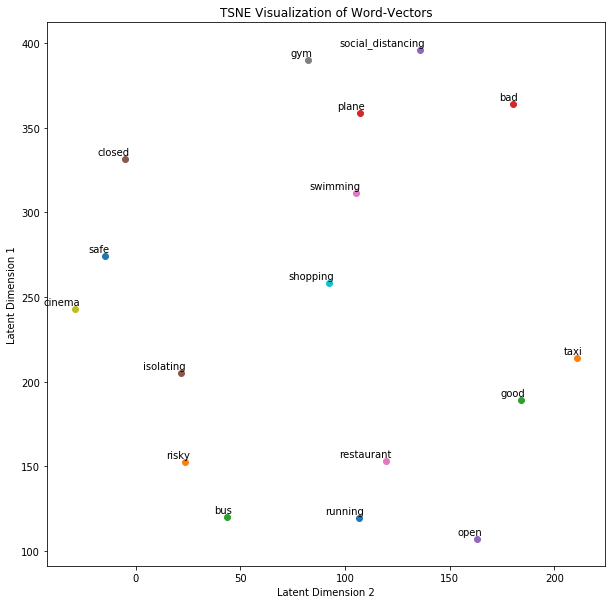

In [28]:
tsne_plot(my_word_list, my_word_vectors, 3000, 23,  "TSNE Visualization of Word-Vectors")

In [102]:
import build_lexicon 
import word_lists 
import dimension
import semantic_svm

import importlib
importlib.reload(word_lists)

<module 'word_lists' from '/home/schaa/Insight_Project_Framework/training/word_lists.py'>

In [103]:
# genderwords = build_lexicon.dimension_lexicon_builtin('gender', currentmodel) 
safewords = build_lexicon.dimension_lexicon_builtin('safe', currentmodel) 

In [104]:
safe = dimension.dimension(safewords,'larsen') 

for i in [safe]:
    print('\033[1m' + i.semantic_direction.direction_of_interest + '\033[0m' + " method:" + str(i.method) ,
          "\n \t Train Accuracy: " + str(round(i.trainaccuracy()[0],2)) , "Test Accuracy: " + str(round(i.testaccuracy()[0],2)), '\n'
            "\t Correct/Total Train N:", str(sum(equal(i.trainaccuracy()[1],i.trainaccuracy()[2]))) + "/" + str(len(i.trainaccuracy()[2])) , '\n'
            "\t Correct/Total Test N:", str(sum(equal(i.testaccuracy()[1],i.testaccuracy()[2]))) +  "/" + str(len(i.testaccuracy()[2])) , '\n' )

safe method:larsen 
 	 Train Accuracy: 0.92 Test Accuracy: 0.93 
	 Correct/Total Train N: 59/64 
	 Correct/Total Test N: 13/14 



In [108]:
def acc_plot(testing_dimension, dimension_lexicon):
    rcParams['figure.figsize'] = 15,9
    
    
    myplot= stripplot(testing_dimension.testaccuracy()[3], dimension_lexicon.pos_test + dimension_lexicon.neg_test, testing_dimension.testaccuracy()[1], size=10)
    L= plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
               ncol=2, shadow=True, title="True Class", fancybox=True)
    plt.ylabel("Testing Words")
    plt.xlabel("Cosine similarity to dimension, possible range -1 (" + dimension_lexicon.neg_label + ") to +1 (" + dimension_lexicon.pos_label + ")" )
    L.get_texts()[0].set_text(dimension_lexicon.neg_label)
    L.get_texts()[1].set_text(dimension_lexicon.pos_label)
    
    plt.axvline(x=0, color='red', linestyle='dashed')
    plt.title("Cosine similarity between testing words and "+ str(testing_dimension.semantic_direction.direction_of_interest) + " dimension" )
    myplot.grid(b=True, linestyle='dashed')
    plt.show()

[0.028205942, 0.027229566, 0.05709841, 0.09104447, 0.04997372, -0.040781796, -0.13403529, -0.12381462, -0.15427205, -0.1714447, -0.05391199, -0.15154207, -0.07031882, -0.07768163] [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


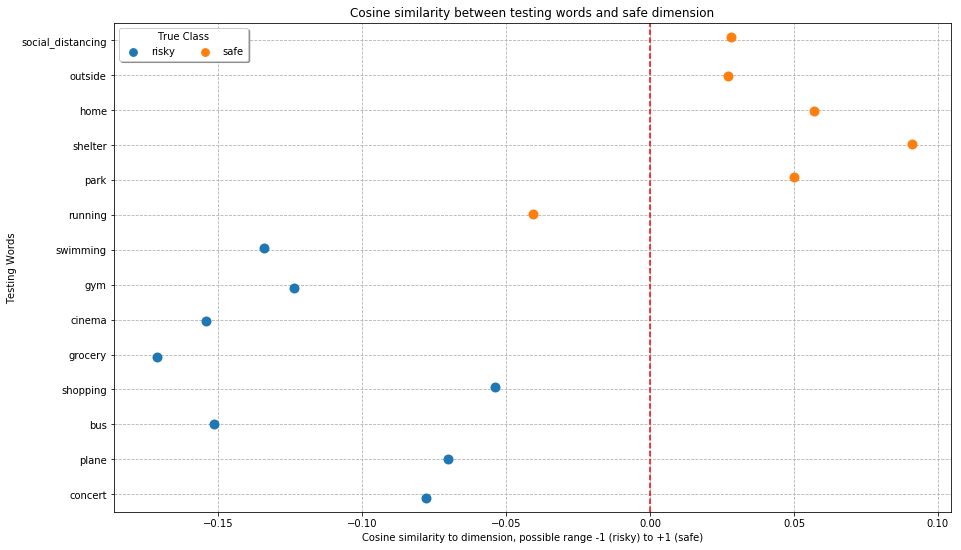

In [109]:
# acc_plot(good, goodwords) #change this to a dimension lexicon and corresponding set of words
acc_plot(safe, safewords) 

In [114]:
safe_test={'pos': ['social_distancing','outside', 'park', 'home', 'running', 'swimming', 'university'], 'neg': ['gym', 'cinema', 'grocery', 'shopping', 'bus', 'plane', 'restaurant', 'festival']}
value_pos = [(1 - spatial.distance.cosine(currentmodel.wv[i], currentmodel.wv['safe'])) - (1 - spatial.distance.cosine(currentmodel.wv[i], currentmodel.wv['risky']))/2 for i in safe_test['pos']]
value_neg = [(1 - spatial.distance.cosine(currentmodel.wv[i], currentmodel.wv['safe'])) - (1 - spatial.distance.cosine(currentmodel.wv[i], currentmodel.wv['risky']))/2 for i in safe_test['neg']]


In [115]:
print(value_pos)
print(value_neg)

[-0.043697180692106485, 0.09606245532631874, -0.07440789975225925, 0.1465432047843933, -0.273429311811924, 0.07389968796633184, 0.19318725913763046]
[-0.18149377778172493, 0.20394474267959595, -0.06505624670535326, 0.031789710745215416, -0.037211619317531586, 0.19377272948622704, 0.012008894118480384, -0.09890192188322544]


In [116]:
def acc_plot2(value_pos, value_neg, safe_test):
    rcParams['figure.figsize'] = 15,9
    
    myplot= stripplot(value_pos + value_neg, safe_test['pos'] + safe_test['neg'], [1]*7+[0]*9, size=10)
    L= plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
               ncol=2, shadow=True, title="True Class", fancybox=True)
    plt.ylabel("Testing Words")
    plt.xlabel("Cosine similarity to dimension, possible range -1 (risky) to +1 (safe)" )
    L.get_texts()[0].set_text('risky')
    L.get_texts()[1].set_text('safe')
    
    plt.axvline(x=0, color='red', linestyle='dashed')
    plt.title("Cosine similarity between testing words and "+ 'safe' + " dimension" )
    myplot.grid(b=True, linestyle='dashed')
    plt.show()
    
acc_plot2(value_pos, value_neg, safe_test)

KeyError: 'social_distancing'